# CS109B: Group 41 Final Project EDA (Part 2)

### Sonia Kangaju

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Add lead name headers to subject-level CSVs 

In [7]:
# Get lead names in order
annot1 = pd.read_csv("annotation_csvs/1.csv")
leadnames = annot1.columns[1:]

In [ ]:
for x in range(1,201):
    path = f"data_csvs/{x}.csv"
    df = pd.read_csv(path, names=leadnames)
    df.to_csv(path)

## Group signals by lead type 

In [25]:
i = []
ii = []
iii = []
avr = []
avl = []
avf = []
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
v6 = []

for x in range(1,201):
    path = f"data_csvs/{x}.csv"
    df = pd.read_csv(path, index_col=0)
    i.append(df.i.values)
    ii.append(df.ii.values)
    iii.append(df.iii.values)
    avr.append(df.avr.values)
    avl.append(df.avl.values)
    avf.append(df.avf.values)
    v1.append(df.v1.values)
    v2.append(df.v2.values)
    v3.append(df.v3.values)
    v4.append(df.v4.values)
    v5.append(df.v5.values)
    v6.append(df.v6.values)

In [26]:
# Normalize with min-max scaling and save to csv
lead_data = [i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6]
for k in range(12):
    lead_data[k] = MinMaxScaler().fit_transform(lead_data[k])
    pd.DataFrame(lead_data[k]).to_csv(f"lead_csvs/{leadnames[k]}.csv")

## PCA analysis of signals by lead type

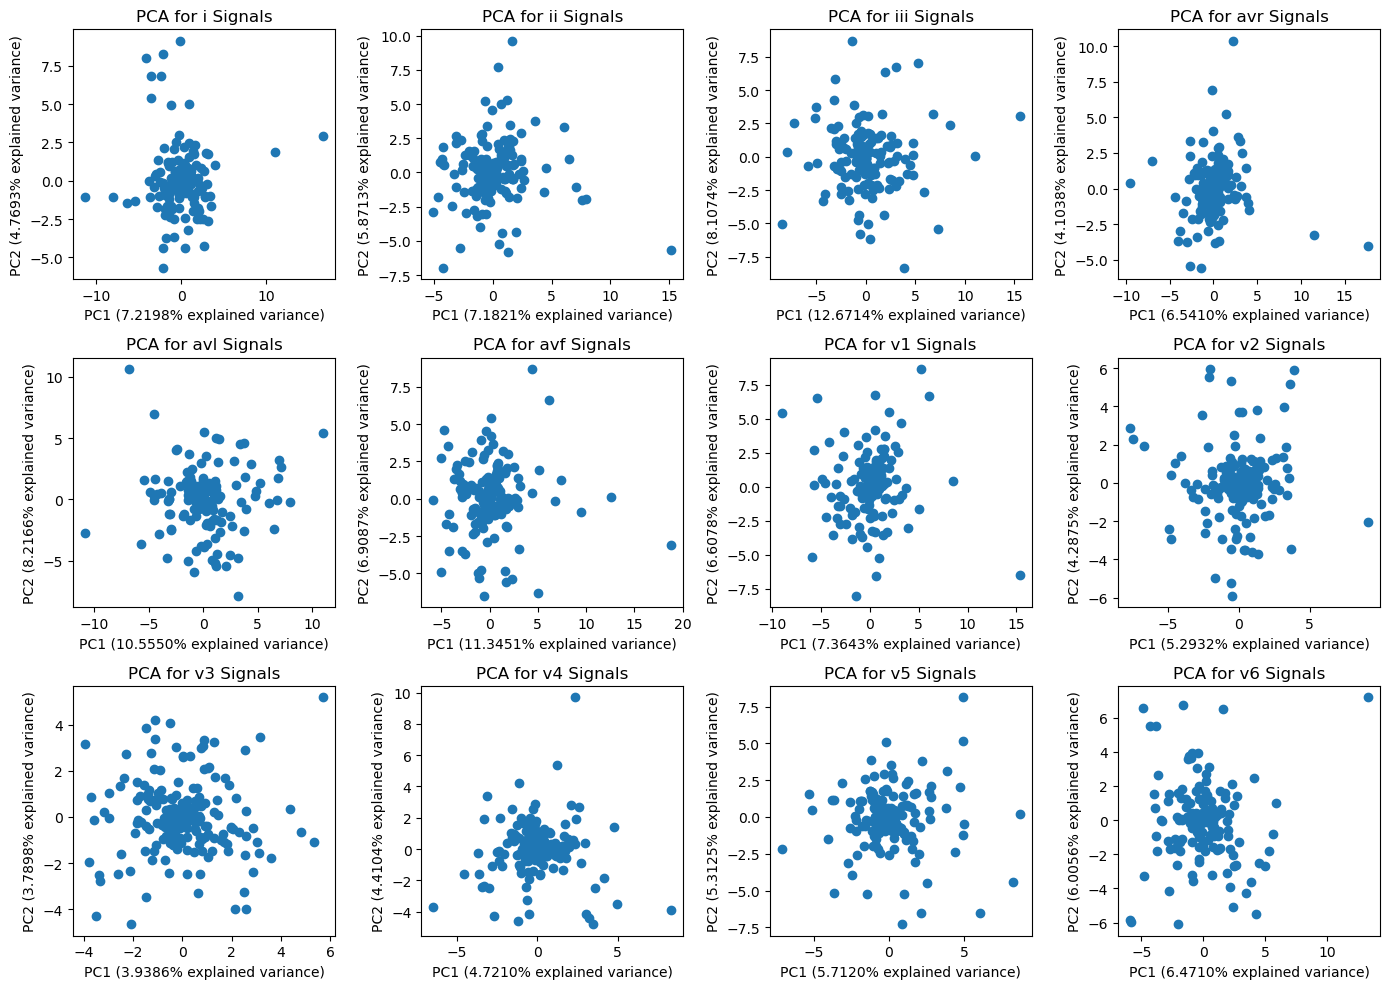

In [28]:
pca = PCA()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(14,10))
axs = ax.ravel()

for k in range(12):
    data = lead_data[k]
    PC = pca.fit_transform(data)
    var_exp = pca.explained_variance_ / sum(pca.explained_variance_)
    axs[k].plot(PC[:,0], PC[:,1],'o')
    axs[k].set_title(f"PCA for {leadnames[k]} Signals")
    axs[k].set_xlabel(f"PC1 ({100*var_exp[0]:1.4f}% explained variance)")
    axs[k].set_ylabel(f"PC2 ({100*var_exp[1]:1.4f}% explained variance)")
plt.tight_layout()
plt.savefig("signalPCA.png");